In [24]:

import pandas as pd
import string
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv(r"data\trustpilot_extended.csv", index_col= 0)
df.head()

,username,number_reviews,location,rating,text,date_of_experience,date_posted,subject,answer,company,...,local_hour,local_date_posted,days_between_experience_and_post,day_of_week_posted,Sentiment_Blob,VADER_Sentiment,Sentiment_Blob_cat,Sentiment_VADER_cat,len_review,len_subject
0,Rob Crane,2,CA,5,The company rep I worked with made my transact...,2024-06-15,2024-10-23 04:17:44,The company rep I worked with made my…,0,Flashbay,...,21,2024-10-22,129,1,0.331111,0.5598,4.0,4,31,8
1,Pat Anderson,1,US,5,I highly recommend using Flashbay. Immediately...,2024-10-16,2024-10-16 19:34:05,I highly recommend using Flashbay,0,Flashbay,...,12,2024-10-16,0,2,0.374583,0.6879,4.0,5,46,5
2,Margarita Orlova,1,CZ,5,I had the pleasure of working with Shelby Gibs...,2024-10-10,2024-10-17 10:27:44,Great customer service,0,Flashbay,...,10,2024-10-17,7,3,0.291284,0.9691,4.0,5,46,3
3,Paola Rivas,1,US,5,I had a fantastic experience with Brian Truong...,2024-10-21,2024-10-21 22:38:50,Outstanding Support and Attentive Service,0,Flashbay,...,15,2024-10-21,0,0,0.600000,0.9215,4.0,5,26,5
4,Fiona Mckelvey Keenan,3,CA,5,My number-one go-to for computer accessories. ...,2024-07-11,2024-10-23 04:09:05,My number-one go-to for computer…,0,Flashbay,...,21,2024-10-22,103,1,0.400000,0.8653,4.0,5,31,5


In [5]:
# List of punctuation marks to count
punctuation_marks = list(string.punctuation)

# Create new columns for each punctuation mark initialized to 0
for mark in punctuation_marks:
    df[mark] = 0

# Count punctuation marks in each text entry
for index, row in df.iterrows():
    text = row['text']
    for mark in punctuation_marks:
        df.at[index, mark] = text.count(mark)

# Display the updated DataFrame
df.head()

,username,number_reviews,location,rating,text,date_of_experience,date_posted,subject,answer,company,...,[,\,],^,_,`,{,|,},~
0,Rob Crane,2,CA,5,The company rep I worked with made my transact...,2024-06-15,2024-10-23 04:17:44,The company rep I worked with made my…,0,Flashbay,...,0,0,0,0,0,0,0,0,0,0
1,Pat Anderson,1,US,5,I highly recommend using Flashbay. Immediately...,2024-10-16,2024-10-16 19:34:05,I highly recommend using Flashbay,0,Flashbay,...,0,0,0,0,0,0,0,0,0,0
2,Margarita Orlova,1,CZ,5,I had the pleasure of working with Shelby Gibs...,2024-10-10,2024-10-17 10:27:44,Great customer service,0,Flashbay,...,0,0,0,0,0,0,0,0,0,0
3,Paola Rivas,1,US,5,I had a fantastic experience with Brian Truong...,2024-10-21,2024-10-21 22:38:50,Outstanding Support and Attentive Service,0,Flashbay,...,0,0,0,0,0,0,0,0,0,0
4,Fiona Mckelvey Keenan,3,CA,5,My number-one go-to for computer accessories. ...,2024-07-11,2024-10-23 04:09:05,My number-one go-to for computer…,0,Flashbay,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.columns

Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_of_experience', 'date_posted', 'subject', 'answer', 'company',
       'verification', 'answered', 'local_hour', 'local_date_posted',
       'days_between_experience_and_post', 'day_of_week_posted',
       'Sentiment_Blob', 'VADER_Sentiment', 'Sentiment_Blob_cat',
       'Sentiment_VADER_cat', 'len_review', 'len_subject', '!', '"', '#', '$',
       '%', '&', ''', '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<',
       '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'],
      dtype='object')

In [15]:
# Define columns to exclude
exclude_cols = ['username', 'number_reviews', 'location', 'rating', 'text',
       'date_of_experience', 'date_posted', 'subject', 'answer', 'company',
       'verification', 'answered', 'local_hour', 'local_date_posted',
       'days_between_experience_and_post', 'day_of_week_posted',
       'Sentiment_Blob', 'VADER_Sentiment', 'Sentiment_Blob_cat',
       'Sentiment_VADER_cat', 'len_review', 'len_subject']

# Get the columns to sum by excluding specified columns
include_cols = [col for col in df.columns if col not in exclude_cols]

# Sum the values in the included columns
column_totals = df[include_cols].sum()

# Display the sum of each column
print(column_totals)

!     40468
"      7534
#       292
$      1364
%      1099
&      2546
'     42364
(      8338
)      8999
*      1000
+      1058
,     98398
-     15982
.    241850
/      4637
:      3195
;      1272
<        30
=       181
>        80
?      6766
@       142
[        58
\        26
]        56
^        26
_       294
`        92
{        10
|        10
}         9
~        80
dtype: int64


In [31]:
column_totals.sort_values(ascending= False)


.    241850
,     98398
'     42364
!     40468
-     15982
)      8999
(      8338
"      7534
?      6766
/      4637
:      3195
&      2546
$      1364
;      1272
%      1099
+      1058
*      1000
_       294
#       292
=       181
@       142
`        92
~        80
>        80
[        58
]        56
<        30
^        26
\        26
{        10
|        10
}         9
dtype: int64

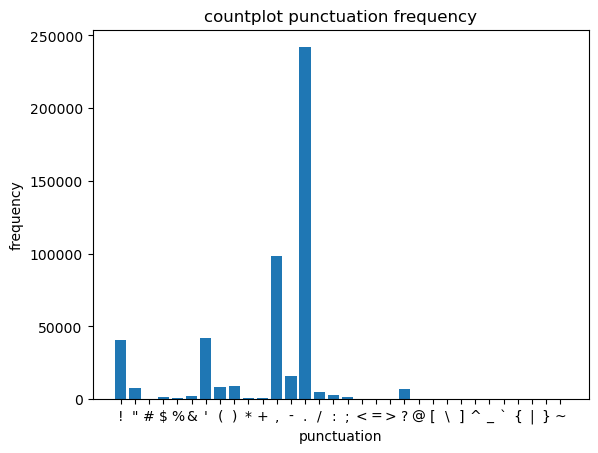

In [29]:
# display punctuation counts
plt.bar(column_totals.index, column_totals.values)
plt.title("countplot punctuation frequency")
plt.xlabel("punctuation")
plt.ylabel("frequency");


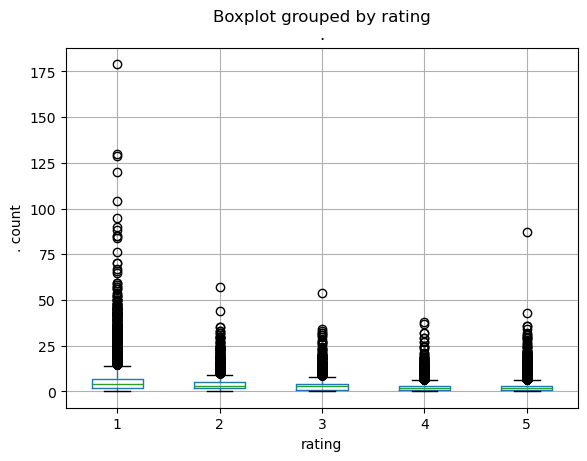

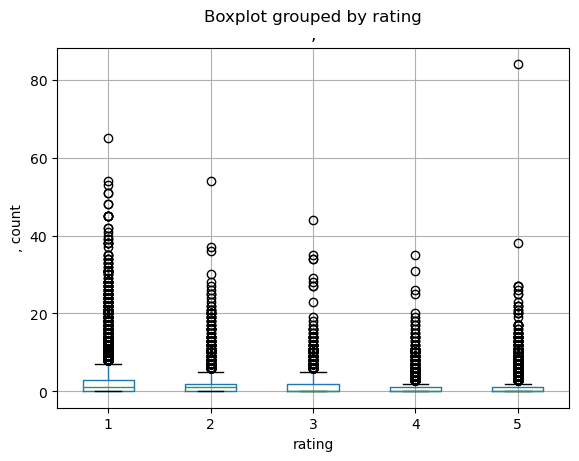

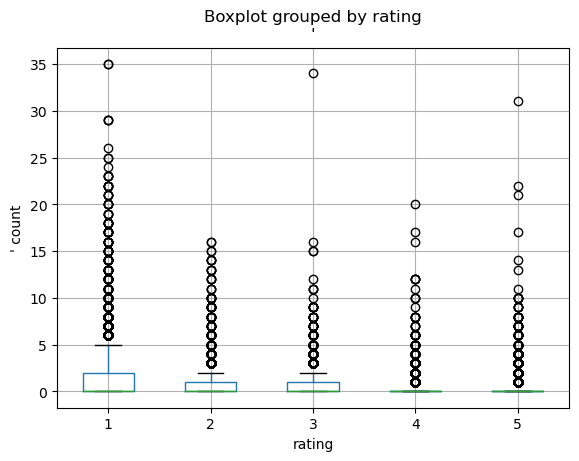

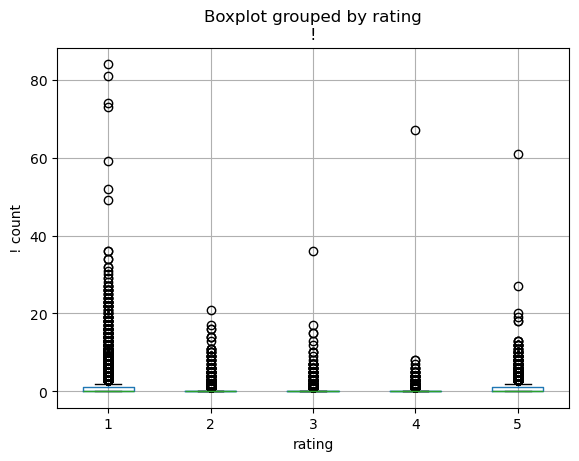

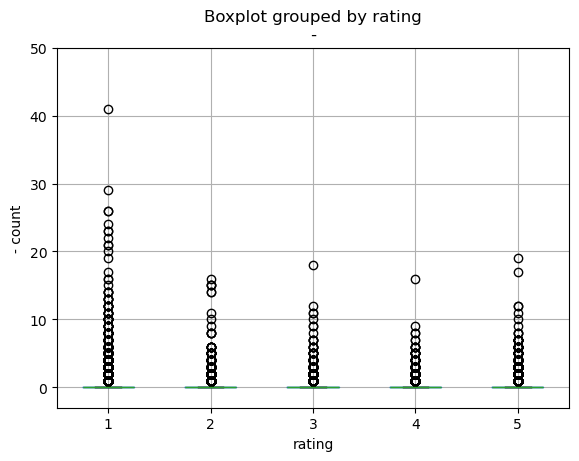

In [55]:
# displaying the distribution of the most frequent punctuations
df.boxplot(column=".", by="rating")
plt.ylabel(". count")

df.boxplot(column=",", by="rating")
plt.ylabel(", count")

df.boxplot(column="'", by="rating")
plt.ylabel("' count")

df.boxplot(column="!", by="rating")
plt.ylabel("! count");



In [56]:
df.to_csv("trustpilot_extended.csv", index=False)